In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# تحميل البيانات
df = pd.read_csv('D:\Elevvo\Customer Segmentation\Mall_Customers.csv')


<>:8: SyntaxWarning: invalid escape sequence '\E'
<>:8: SyntaxWarning: invalid escape sequence '\E'
C:\Users\Jana\AppData\Local\Temp\ipykernel_18328\1719632952.py:8: SyntaxWarning: invalid escape sequence '\E'
  df = pd.read_csv('D:\Elevvo\Customer Segmentation\Mall_Customers.csv')


In [4]:
data = df[['Annual Income (k$)', 'Spending Score (1-100)']]


In [6]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)


C:\Users\Jana\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Jana\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Jana\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Jana\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows wi

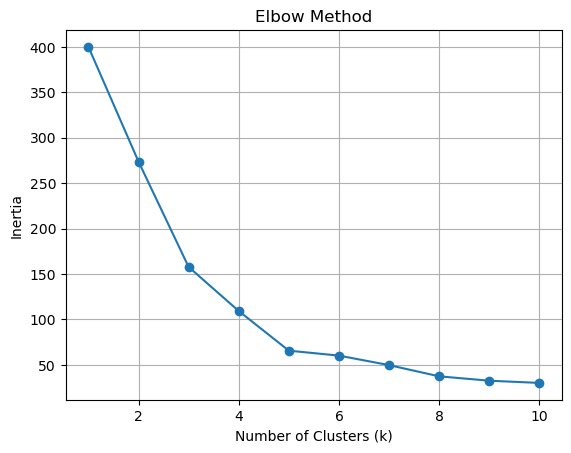

In [8]:
inertia = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# رسم الكوع
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


C:\Users\Jana\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


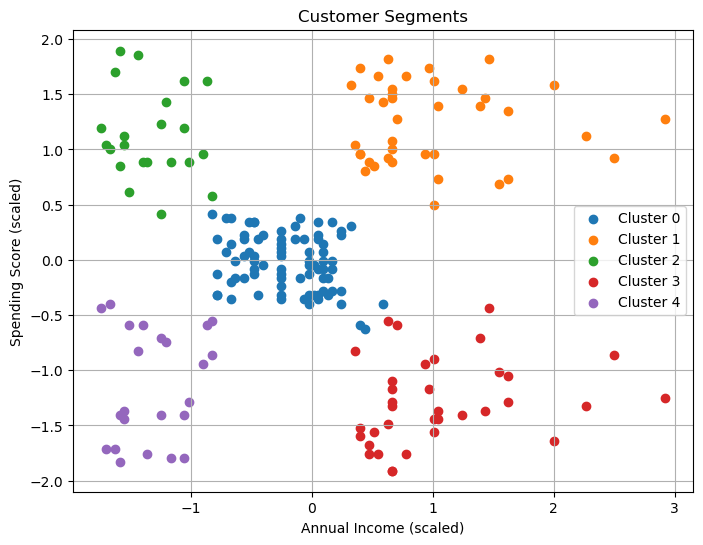

In [12]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(scaled_data)
labels = kmeans.labels_
plt.figure(figsize=(8, 6))
for cluster in range(5):
    plt.scatter(
        scaled_data[labels == cluster, 0],
        scaled_data[labels == cluster, 1],
        label=f'Cluster {cluster}'
    )

plt.title('Customer Segments')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.legend()
plt.grid(True)
plt.show()

df['Cluster'] = labels


In [14]:
cluster_summary = df.groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean()
print(cluster_summary)


         Annual Income (k$)  Spending Score (1-100)
Cluster                                            
0                 55.296296               49.518519
1                 86.538462               82.128205
2                 25.727273               79.363636
3                 88.200000               17.114286
4                 26.304348               20.913043
